In [1]:
import ast

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import shutil
import tarfile

import tensorflow as tf

from auxiliary import values as v
from auxiliary.data.dataset_ht import find_group

import napari
from auxiliary.data.dataset_nuclei import NucleiDataset
from auxiliary.data.dataset_ht import HtDataset, find_group
from auxiliary.data import imaging

from nuclei_segmentation.processing.preprocessing import Preprocessing
from filtering import cardiac_region as cr

NO. Cells/nucleis per specimen and per group

0806_E5 Gr1
	Found: 20190806_E5_cell_properties_radiomics_Membrane_myocardium_filtered.csv
	Found: 20190806_E5_cell_properties_radiomics_Nuclei_myocardium_filtered.csv
0504_E1 Gr1
	Found: 20190504_E1_cell_properties_radiomics_Membrane_myocardium_filtered.csv
	Found: 20190504_E1_cell_properties_radiomics_Nuclei_myocardium_filtered.csv
0208_E2 Gr1
	No directory: /run/user/1003/gvfs/smb-share:server=tierra.cnic.es,share=sc/LAB_MT/LAB/Ignacio/Gr11/Features/Filtered
No specimen found: 0208_E2 (Get features) [Membrane - myocardium]
0521_E4 Gr1
	Found: 20190521_E4_cell_properties_radiomics_Membrane_myocardium_filtered.csv
	Found: 20190521_E4_cell_properties_radiomics_Nuclei_myocardium_filtered.csv
0521_E2 Gr1
	No directory: /run/user/1003/gvfs/smb-share:server=tierra.cnic.es,share=sc/LAB_MT/LAB/Ignacio/Gr11/Features/Filtered
No specimen found: 0521_E2 (Get features) [Membrane - myocardium]
0516_E2 Gr2
	Found: 20190516_E2_cell_properties_radiomics_Membrane_myocardium_filtered.csv
	Found: 20190

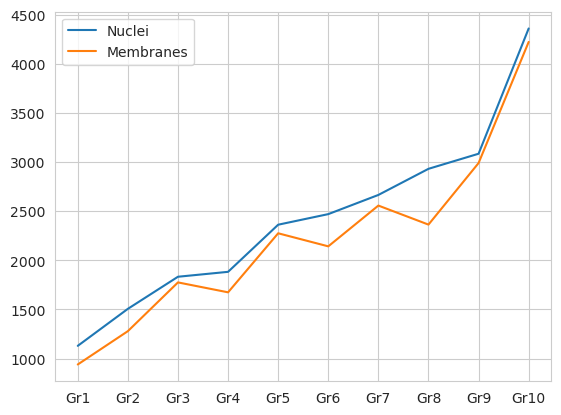

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from auxiliary import values as v
from auxiliary.data.dataset_ht import HtDataset, find_group

nuclei = {}
membranes = {}
no_specs = {}

for s in v.specimens_list:
    gr = find_group(s)
    print(s, gr)
    try:
        ds = HtDataset(data_path=v.data_path) #  + 'auxiliary/'
        
        features_mem = ds.get_features(s, 'Membrane', 'myocardium', verbose=1, filtered=True)
        features_nu = ds.get_features(s, 'Nuclei', 'myocardium', verbose=1, filtered=True)
        
        # Check if the specimen's group is already in the dictionary
        if gr not in nuclei:
            nuclei[gr] = len(features_nu)
            membranes[gr] =len(features_mem)
            no_specs[gr] = 1
            
        else:
            # Avergage
            nuclei[gr] += len(features_nu)
            membranes[gr] += len(features_mem)
            no_specs[gr] += 1
    except Exception as e:
        print(e)
        continue
        
# Average
for k in nuclei.keys():
    nuclei[k] /= no_specs[k]
    membranes[k] /= no_specs[k]

plt.plot(nuclei.keys(), nuclei.values(), label='Nuclei')
plt.plot(membranes.keys(), membranes.values(), label='Membranes')
plt.legend()
plt.show()    
    

In [2]:
s = '0401_E3'

ds = HtDataset()

# nuclei_raw_path, _ = ds.read_specimen(s, 'Nuclei', 'Segmentation', verbose=1)
# nuclei_raw = imaging.read_image(nuclei_raw_path)

# mem_raw_path, _ = ds.read_specimen(s, 'Membrane', 'RawImages', verbose=1)
# mem_raw = imaging.read_image(mem_raw_path)

lines, _ = ds.read_line(s, verbose=1)
lines = imaging.read_image(lines)

	Found: line_20190806_E4.nii.gz


In [ ]:
myo_line = np.where(lines == 1, 1, 0)
imaging.save_nii(myo_line.astype(np.int32), 'myo_line.nii.gz')

In [3]:

# aux = cr.filter_by_tissue(nuclei_raw, lines, 'myocardium', 2, 3, 1)
# imaging.save_nii(aux, 'myo.nii.gz')

In [4]:
from scipy.ndimage import rotate

# lines_rot = rotate(lines, 90, axes=(0, 2))
lines_rot = lines

In [5]:
myo_line = np.where(lines_rot == 1, 1, 0)
spl_line = np.where(lines_rot == 5, 1, 0)
some_line = np.where(lines_rot == 4, 1, 0)
prox_line = np.where(lines_rot == 6, 1, 0)

In [6]:
# imaging.save_nii(myo_line.astype(np.int8), 'myo_line.nii.gz')
# imaging.save_nii(spl_line.astype(np.int8), 'spl_line.nii.gz')
# imaging.save_nii(some_line.astype(np.int8), 'some_line.nii.gz')
# imaging.save_nii(prox_line.astype(np.int8), 'prox_line.nii.gz')

In [7]:
# pp = Preprocessing([
#     # 'isotropy',
#     'norm_percentile',
#     'bilateral',
# ])

# nuclei = pp.run(nuclei_raw_path, verbose=1)
# mem = pp.run(mem_raw_path, verbose=1)

In [8]:
viewer = napari.Viewer()
# viewer.add_image(nuclei, name='Nuclei', colormap='blue')
# viewer.add_image(mem, name='Membrane', colormap='green')

In [9]:
viewer.add_image(myo_line, name='Myocardium', colormap='blue')

<Image layer 'Myocardium' at 0x76349ff6f6d0>

In [10]:

viewer.add_image(spl_line, name='Splanchnic', colormap='pink')

<Image layer 'Splanchnic' at 0x76349d7f0310>

In [11]:

viewer.add_image(some_line, name='Somatic', colormap='purple')

<Image layer 'Somatic' at 0x76349c18a3b0>

In [12]:

viewer.add_image(prox_line, name='Proximal', colormap='green')

<Image layer 'Proximal' at 0x76349c0f4400>

In [ ]:
# imaging.save_nii(myo_line.astype(np.uint8), 'myo_line.nii')
# imaging.save_nii(spl_line.astype(np.uint8), 'spl_line.nii')
# imaging.save_nii(some_line.astype(np.uint8), 'some_line.nii')
# imaging.save_nii(prox_line.astype(np.uint8), 'prox_line.nii')

# imaging.save_nii(nuclei.astype(np.float32), 'nuclei.nii')
# imaging.save_nii(mem.astype(np.float32), 'membrane.nii')